# TUTORIAL 4: Surfaces


## Weingarten endomorphism, principal curvatures and principal directions. 
Let $f:U\subset \mathbb{R}^2 \to \mathbb{R}^3$ be a regular parameterized surface of class $C^2$. We recall that at the point $m_0=f(x_0,y_0)$, the two vectors $\mathcal{B}_{m_0}:=(\frac{\partial f}{\partial x}(x_0,y_0),\frac{\partial f}{\partial y}(x_0,y_0))$ form a basis of the tangent space. 

$\bullet$ The matrix of the first fundamental form in the basis $\mathcal{B}_{m_0}$ is given by
$$
I_{m_0}=\left(\begin{array}{cc}
E_{m_0}&F_{m_0}\\
F_{m_0}&G_{m_0}\\
\end{array}
\right)
$$
with
$$
\quad E_{m_0}=\left\| \frac{\partial f}{\partial x}(x_0,y_0)\right\|^2\quad
F_{m_0}=\langle \frac{\partial f}{\partial x}(x_0,y_0),\frac{\partial f}{\partial y}(x_0,y_0)\rangle\quad
G_{m_0}=\left\| \frac{\partial f}{\partial y}(x_0,y_0)\right\|^2
$$

$\bullet$ The matrix of the second fundamental form is given by
$$
II_{m_0}=\left(\begin{array}{cc}
L_{m_0}&M_{m_0}\\
M_{m_0}&N_{m_0}\\
\end{array}
\right)
$$
with
$$
\quad L_{m_0}=\langle \frac{\partial^2 f}{\partial x^2}(x_0,y_0),K(x_0,y_0)\rangle\quad
M_{m_0}=\langle \frac{\partial^2 f}{\partial x\partial y}(x_0,y_0),K(x_0,y_0)\rangle\quad
N_{m_0}=\langle \frac{\partial^2 f}{\partial y^2}(x_0,y_0),K(x_0,y_0)\rangle\quad
$$
where $K(x_0,y_0)=\frac{\frac{\partial f}{\partial x}(x_0,y_0)\wedge\frac{\partial f}{\partial y}(x_0,y_0)}{\|\frac{\partial f}{\partial x}(x_0,y_0)\wedge\frac{\partial f}{\partial y}(x_0,y_0)\|}$.

$\bullet$ The matrix of the Weingarten endomorphism at $m_0$ in the basis $\mathcal{B}_{m_0}$ is given by 
$$
A_{m_0}= I_{m_0}^{-1} II_{m_0}
$$
The eigenvalues $\lambda_1$ and $\lambda_2$ of $A_{m_0}$ are called the principal curvatures.

The eigenvectors $\vec{e_1}$ and $\vec{e_2}$ of $A_{m_0}$ are called the principal directions.


In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

def partX(f,x0,y0, h = 0.0001):
    return (f(x0+h,y0)-f(x0-h,y0))/(2*h)
def partY(f,x0,y0, h = 0.0001):
    return (f(x0,y0+h)-f(x0,y0-h))/(2*h)
def part2X(f,x0,y0,h = 0.0001):
  return (f(x0-h,y0)-2*f(x0,y0)+f(x0+h,y0))/h**2
def part2Y(f,x0,y0,h = 0.0001):
  return (f(x0,y0-h)-2*f(x0,y0)+f(x0,y0+h))/h**2
def part2XY(f,x0,y0,h = 0.0001):
  return (partY(f,x0+h,y0)-partY(f,x0-h,y0))/(2*h)


In [2]:
def E(f,x0,y0):
  return norm(partX(f,x0,y0))**2
def G(f,x0,y0):
  return norm(partY(f,x0,y0))**2
def F(f,x0,y0):
  return np.matmul(partX(f,x0,y0),partY(f,x0,y0))


In [3]:
def K(f,x0,y0):
  return np.cross(partX(f,x0,y0),partY(f,x0,y0))/norm(np.cross(partX(f,x0,y0),partY(f,x0,y0)))
def L(f,x0,y0):
  return np.matmul(part2X(f,x0,y0),K(f,x0,y0))
def M(f,x0,y0):
  return np.matmul(part2XY(f,x0,y0),K(f,x0,y0))
def N(f,x0,y0):
  return np.matmul(part2Y(f,x0,y0),K(f,x0,y0))

In [4]:
def I(f,x0,y0):
  return np.array([[E(f,x0,y0),F(f,x0,y0)],[F(f,x0,y0),G(f,x0,y0)]])
def II(f,x0,y0):
  return np.array([[L(f,x0,y0),M(f,x0,y0)],[M(f,x0,y0),N(f,x0,y0)]])
def A(f,x0,y0):
  return np.matmul(np.linalg.inv(I(f,x0,y0)),II(f,x0,y0))

In [5]:
def Pcurv(f,x0,y0):
  return np.linalg.eig(A(f,x0,y0))[0]
  
def Pdir(f,x0,y0):
  return np.linalg.eig(A(f,x0,y0))[1]

# PART 1. Numerical computation of principal directions
We want to compute a function that numerically compute the principal vectors and principal directions of a paramatrized surface $f:U\to \mathbb{R}^2$ at a point $f(x_0,y_0)$. Namely, we want to define a function whose signature can for instance be 
$$
\textbf{def principal}(f, x_0, y_0, h=0.001):
$$

  # PART 2. Application to different surfaces
  ## 1) PRINCIPAL DIRECTIONS OF THE CONE
 Below we give a parametrization of a cone of apex $(0,0,0)$ and vertical axis $(0z)$ and plot it


In [6]:
def C1(f,x0,y0):
    C1 = np.array([f(x0,y0) + t*(Pdir(f,x0,y0)[0,0]*partX(f,x0,y0) + Pdir(f,x0,y0)[1,0]*partY(f,x0,y0))  for t in np.linspace(-Pcurv(f,x0,y0)[0],Pcurv(f,x0,y0)[0])])
    plt.plot(C1[:,0],C1[:,1],C1[:,2],color='red')
    return C1

def C2(f,x0,y0):
    C2 = np.array([f(x0,y0) + t*(Pdir(f,x0,y0)[0,1]*partX(f,x0,y0) + Pdir(f,x0,y0)[1,1]*partY(f,x0,y0)) for t in np.linspace(-Pcurv(f,x0,y0)[1],Pcurv(f,x0,y0)[1])])
    plt.plot(C2[:,0],C2[:,1],C2[:,2],color='blue')
    return C2



In [17]:
def f(u,v):
  return np.array([v*np.cos(u),v*np.sin(u),v])

In [18]:
x0 = np.pi
y0 = 0.5


<IPython.core.display.Javascript object>


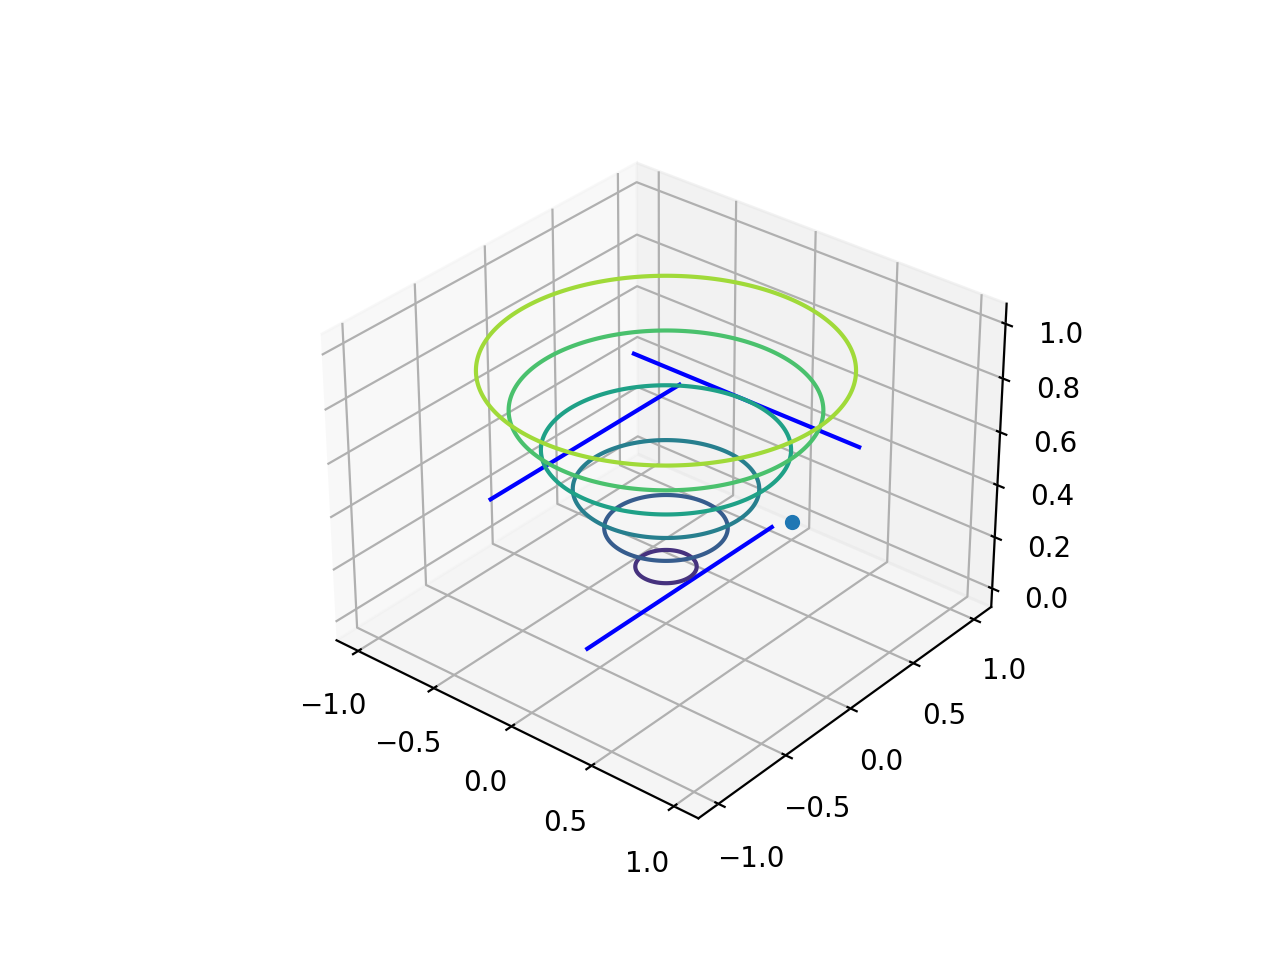

[[0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 3.06161699e-17]]


In [19]:
%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')

n = 1000
# Parametrization of a cone
u = np.linspace(0,2*np.pi,n)
v = np.linspace(0,1,n)
u,v = np.meshgrid(u,v)

x = v*np.cos(u)
y = v*np.sin(u)
z = v

# plot of the cone
#ax.plot_surface(x,y,z)
ax.contour(x,y,z)
C1(f,x0,y0);
C2(f,x0,y0);
C2(f,np.pi/2,0.6);
C2(f,2*np.pi,0.1);
print(Pdir(f,x0,y0))





### At some points  $m_0=f(x_0,y_0)$:
### - Calculate the principal curvatures $\lambda_1$ and $\lambda_2$ and principal directions $\vec{e_1}$ and $\vec{e_2}$.
### -  Plot the segments $C_1 = \{m_0 + t \vec{e_1},\ t\in[-\lambda_1,\lambda_1]\}$ and $C_2 = \{m_0 + t \vec{e_2},\ t\in[-\lambda_2,\lambda_2]\}$ 
### -  What do you observe ?

   ## 2) PRINCIPAL DIRECTIONS OF THE HYPERBOLOIDE OF REVOLUTION
 The hyperboloid of revolution is parametrized by
 $$
 \begin{array}{rlll}
 f:&[0,2\pi]\times [-H,H] &\to &\mathbb{R}^3\\
 &(u,v)&\mapsto & (\cos u, \sin u,0)+ v (-\sin u,\cos u,1)\\
 \end{array}
 $$
### At some points  $m_0=f(x_0,y_0)$:
### -  Plot the segments $C_1 = \{m_0 + t \vec{e_1},\ t\in[-\lambda_1,\lambda_1]\}$ and $C_2 = \{m_0 + t \vec{e_2},\ t\in[-\lambda_2,\lambda_2]\}$ 
### -  What do you observe ?

In [20]:
def f(u,v):
  return np.array([np.cos(u)-v*np.sin(u),np.sin(u)+v*np.cos(u),v])

<IPython.core.display.Javascript object>


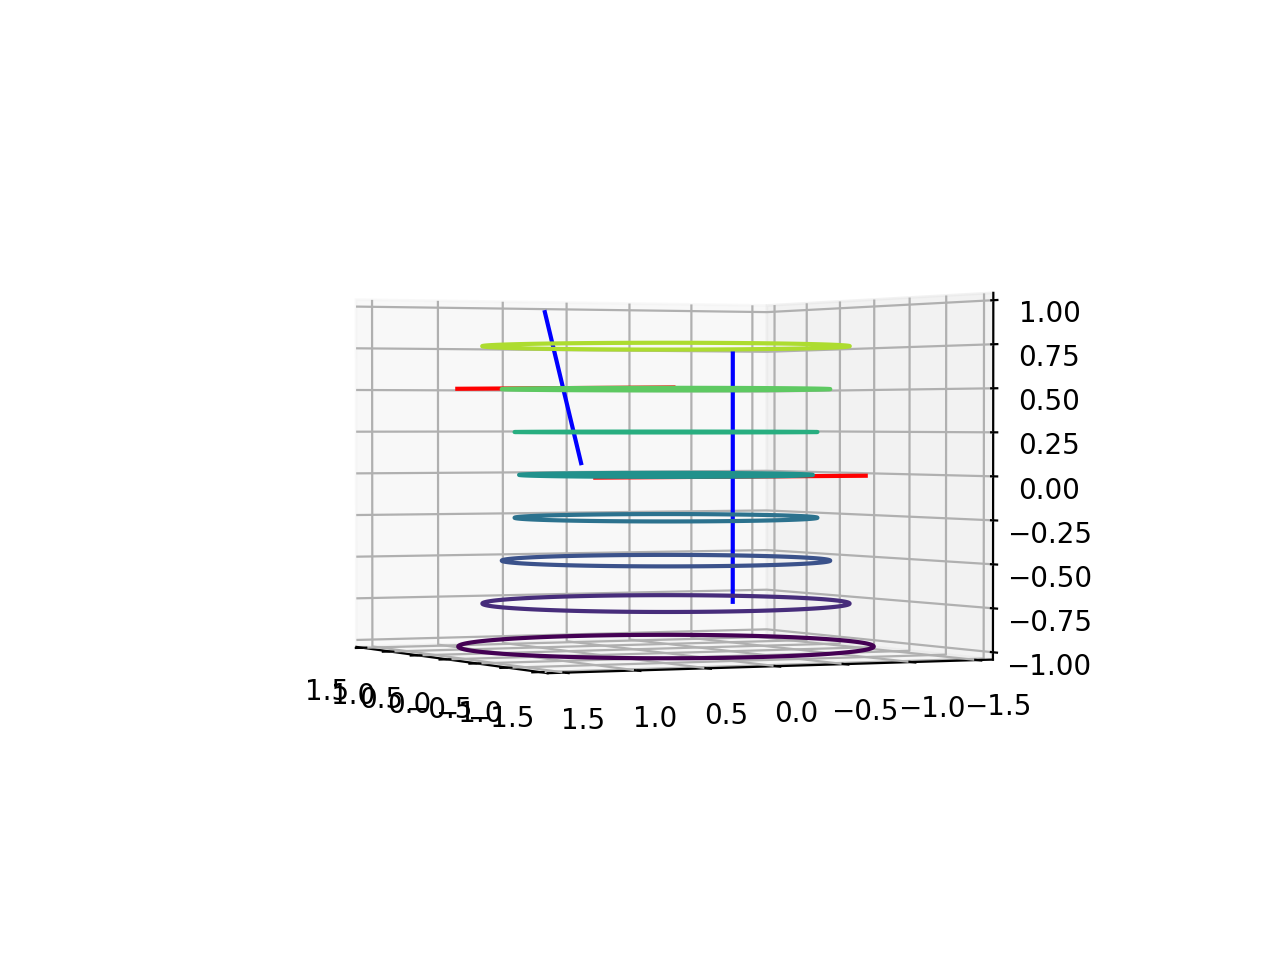

[[1. 1.]
 [1. 2.]]
[[-0.99999999 -0.99999999]
 [-0.99999999  0.        ]]
[[-9.99999999e-01 -1.99999999e+00]
 [ 1.66455649e-09  9.99999996e-01]]
[[-1.00000000e+00  7.07106781e-01]
 [ 8.32278249e-10 -7.07106781e-01]]


In [21]:
x0 = np.pi
y0 = 0
x1 = np.pi/2
y1 = 0.5
H=1
n = 1000
u=np.linspace(0,2*np.pi,n)
v=np.linspace(-H,H,n)
u,v = np.meshgrid(u,v)


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.contour(f(u,v)[0,:],f(u,v)[1,:],f(u,v)[2,:])
print(I(f,x0,y0))
print(II(f,x0,y0))
print(A(f,x0,y0))
print(Pdir(f,x0,y0))



C1(f,x0,y0);
C2(f,x0,y0);
C1(f,x1,y1);
C2(f,x1,y1);



## 3) Sphere
Same questions with the sphere

In [12]:
def f(u,v):
    return np.array([np.cos(u)*np.sin(v),np.sin(u)*np.sin(v),np.cos(v)])

<IPython.core.display.Javascript object>


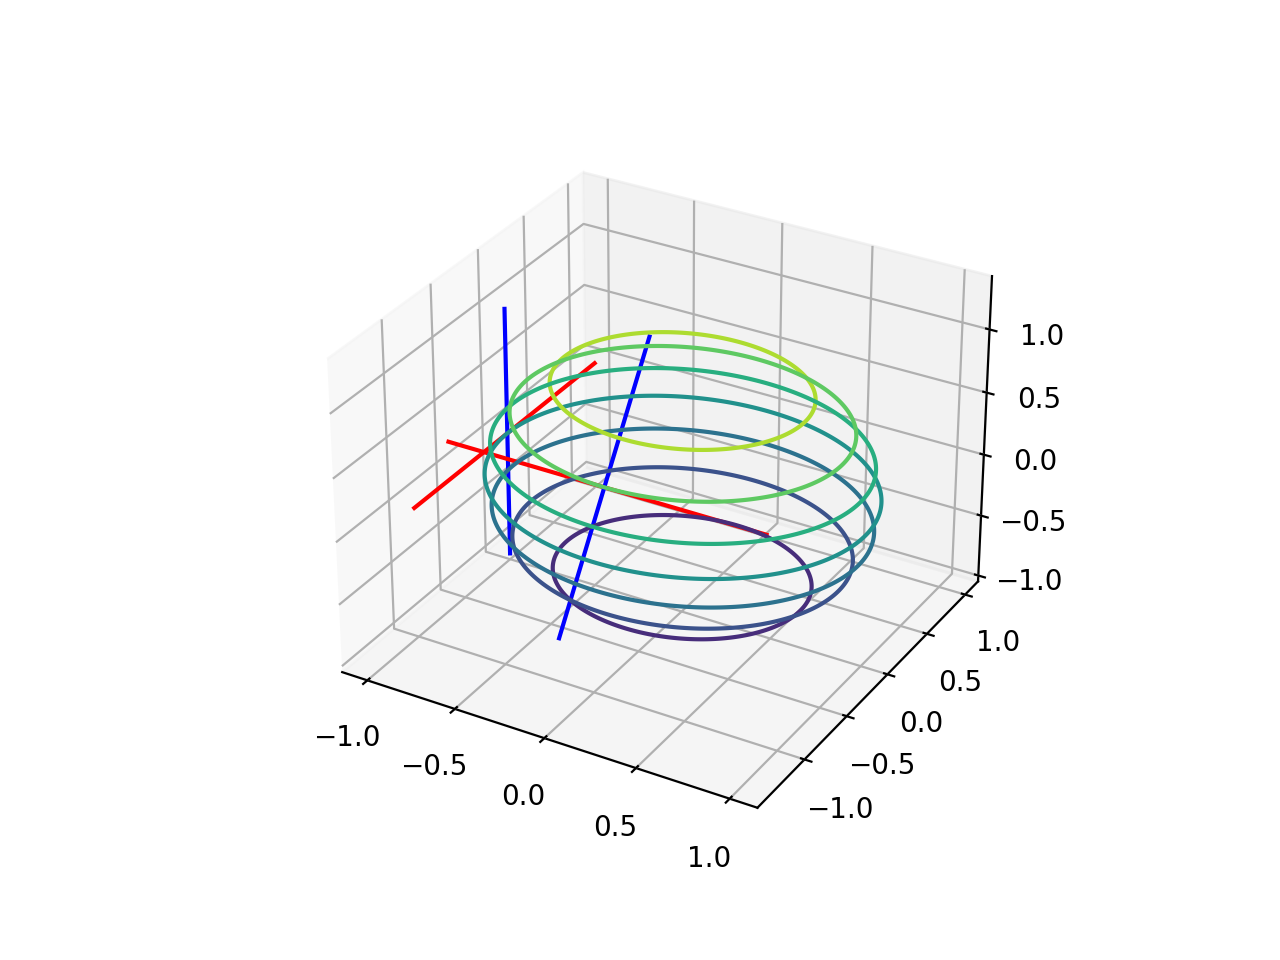

In [13]:
x0 = np.pi
y0 = np.pi/2
x1 = np.pi*3/2
y1 = np.pi/3
n = 1000
u=np.linspace(0,2*np.pi,n)
v=np.linspace(0,np.pi,n)
u,v = np.meshgrid(u,v)


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.contour(f(u,v)[0,:],f(u,v)[1,:],f(u,v)[2,:])


C1(f,x0,y0);
C2(f,x0,y0);
C1(f,x1,y1);
C2(f,x1,y1);

# 4) Helicoid
We consider the helicoid parametrized by 
$$
f(r,\theta) = (r \cos (\alpha \theta), r \sin (\alpha \theta), \theta)
\quad \mbox{with}\quad  r\in [0,R]\quad \mbox{and}\quad \theta \in [0,2\pi[. 
$$
## - Calculate the mean curvature of the helicoid.


In [22]:
alpha = 1
def f(u,v):
    return np.array([u*np.cos(alpha*v),u*np.sin(alpha*v),v])

<IPython.core.display.Javascript object>


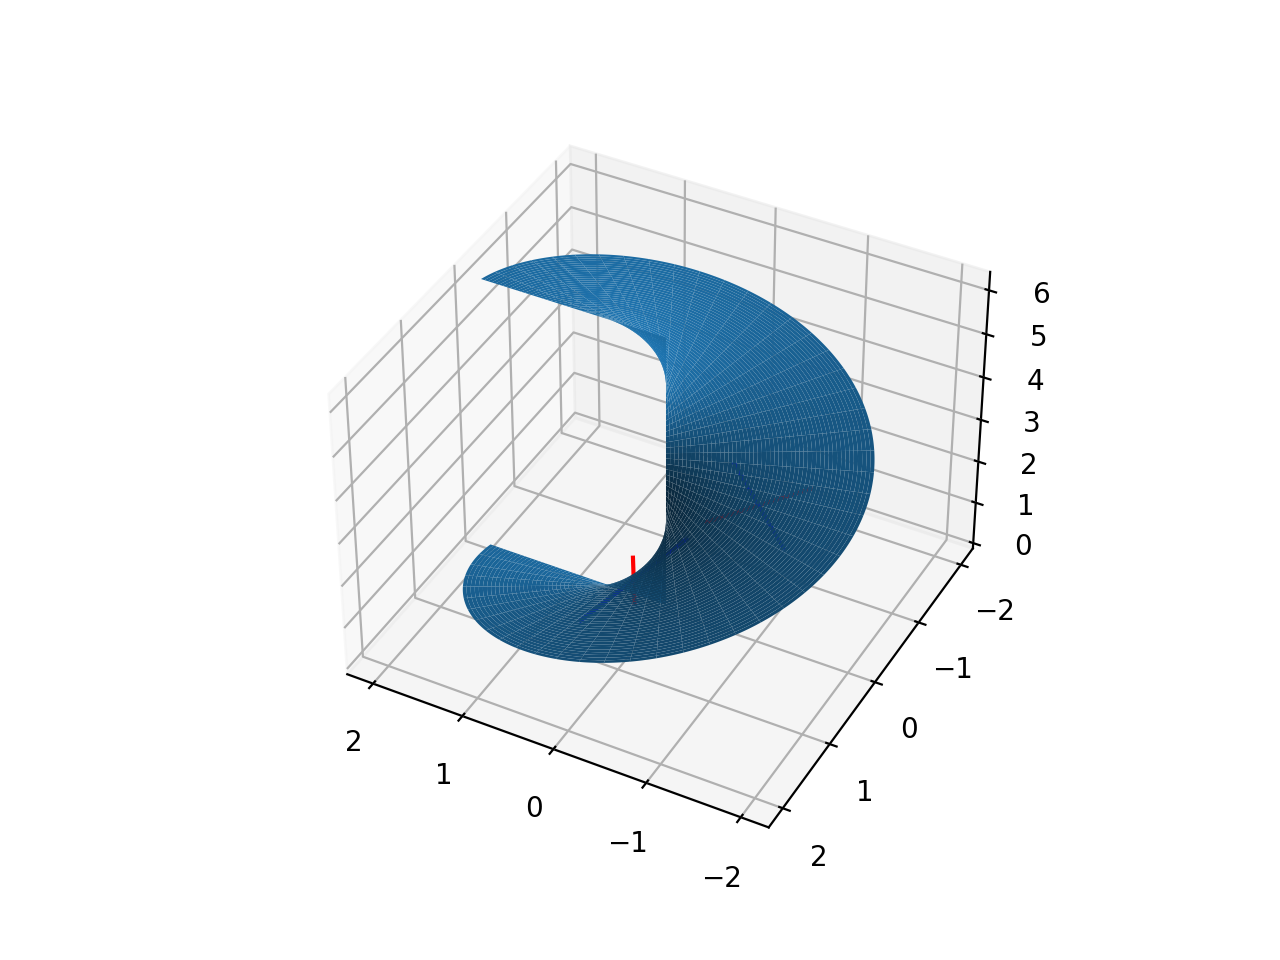

0.0


In [23]:
R = 2
x0 = R/2
y0 = np.pi
x1 = R/3
y1 = np.pi/2
n = 1000
u = np.linspace(0,R,n)
v = np.linspace(0,2*np.pi,n)
u,v = np.meshgrid(u,v)


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(f(u,v)[0,:],f(u,v)[1,:],f(u,v)[2,:])


C1(f,x0,y0);
C2(f,x0,y0);
C1(f,x1,y1);
C2(f,x1,y1);

MeanCurv = np.sum(Pcurv(f,x0,y0))/2
print(MeanCurv)